In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
from datetime import datetime 
from pandas_datareader import data
import scipy.stats as st

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
df = pd.read_csv('../../data/cars.csv')
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [8]:
speed = df['speed']
dist  = df['dist']

### 1. cars(x:speed, y:dist) 데이터를 이용하여 회귀계수(기울기,절편) 를 구하시요. 공식(B0, B1)을 이용하여 구하시요.( 선형회귀분석.pdf 파일 6페이지공식)

In [9]:
def regression(speed, dist):
    denominator2 = 0
    numerator2   = 0

    for i in range(len(speed)):
        denominator  = ( (speed[i]-speed.mean())*(dist[i]-dist.mean()))
        denominator2 += denominator
        
        numerator    = (speed[i]-speed.mean())**2
        numerator2   += numerator
        
        w = denominator2/numerator2
        b = dist.mean() -(w * speed.mean())
    return w, b

w_reg = regression(speed,dist)[0]
b_reg  = regression(speed,dist)[1]

In [10]:
print(f""" 기울기:  {w_reg}
 절편  :  {b_reg}""")

 기울기:  3.9324087591240886
 절편  :  -17.579094890510966


## 확인용

In [11]:
result= st.linregress( df['speed'], df['dist'])
print(' 기울기  : ', result.slope )
print(' 절편    : ', result.intercept)

 기울기  :  3.9324087591240864
 절편    :  -17.579094890510937


### 2.  x=[1,2,3,4,5,6,7,8,9,10]  ,y=[2,4,6,8,10,12,14,16,18,20] 일때 hx = wx 로 하여 학습방법을 이용하여 w값을 구하시요.

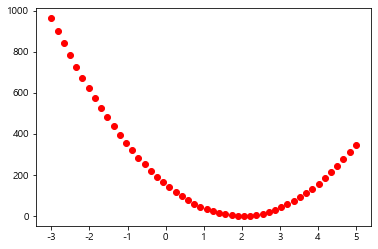

 w가 0.0 이 되는 지점 : 2


In [12]:
x= np.array([1,2,3,4,5,6,7,8,9,10])
y= np.array([2,4,6,8,10,12,14,16,18,20])

def cost(x,y,w):
    c=0
    for i in np.arange( len(x) ):
        hx = w*x[i]
        c  = c+(hx-y[i])**2
    return c/len(x)

for w in np.linspace(-3, 5, 50):
    c = cost( x, y, w)
#     print(w,'|c:',c)
    plt.plot( w, c, 'ro')
plt.show()
print("="*50)    
b=2
print(f" w가 {cost(x,y,b)} 이 되는 지점 : {b}")


##  mse가 가장 낮은 지점을 찾도록 학습

In [13]:
def gradient_descent( x,y,w ):
    c = 0
    for i in range(len(x)):
        hx = w*x[i]
        c = c + (hx-y[i]) *(1/2*x[i]) #편미분
    return c/len(x)

def show_gradient(x, y, w):
    for i in range(20): # 학습 횟수
        c = cost( x,y,w)
        g = gradient_descent(x,y,w)
        w = w-(0.1*g)
        print(f''' {i}, mse : {c}, 
      w : {w}''')
    print('='*30)
    print("w:", w)

show_gradient(x, y, 5)

 0, mse : 346.5, 
      w : -0.7750000000000004
 1, mse : 296.4740625000001, 
      w : 4.5668750000000005
 2, mse : 253.67061972656265, 
      w : -0.37435937500000094
 3, mse : 217.04692400354025, 
      w : 4.196282421875001
 4, mse : 185.71077435052908, 
      w : -0.031561240234375454
 5, mse : 158.8987813036714, 
      w : 3.879194147216798
 6, mse : 135.95776975295394, 
      w : 0.2617454138244617
 7, mse : 116.32886674487122, 
      w : 3.6078854922123726
 8, mse : 99.53388660858043, 
      w : 0.5127059197035551
 9, mse : 85.16368172946665, 
      w : 3.375747024274212
 10, mse : 72.86817517977497, 
      w : 0.7274340025463535
 11, mse : 62.34783238819498, 
      w : 3.1771235476446233
 12, mse : 53.346364087149354, 
      w : 0.9111607184287234
 13, mse : 45.64448277206718, 
      w : 3.007176335453431
 14, mse : 39.05456057184999, 
      w : 1.068361889705576
 15, mse : 33.41605838928917, 
      w : 2.8617652520223427
 16, mse : 28.591614959335573, 
      w : 1.20286714187

### 3. 삼성전자주가중 2020년 종가 표본 100개를 추출하여 2020년 종가의 평균을 신뢰도 95% 로 추정하시요.

In [14]:
# data.get_data_yahoo(종목코드, 시작날짜, 끝날짜)
# 삼성전자
samsungDF = data.get_data_yahoo('005930.KS','2020-01-01', '2020-12-31')
samsungDF

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,56000.0,55000.0,55500.0,55200.0,12993228.0,54098.707031
2020-01-03,56600.0,54900.0,56000.0,55500.0,15422255.0,54392.718750
2020-01-06,55600.0,54600.0,54900.0,55500.0,10278951.0,54392.718750
2020-01-07,56400.0,55600.0,55700.0,55800.0,10009778.0,54686.738281
2020-01-08,57400.0,55900.0,56200.0,56800.0,23501171.0,55666.781250
...,...,...,...,...,...,...
2020-12-23,74000.0,72300.0,72400.0,73900.0,19411326.0,73900.000000
2020-12-24,78800.0,74000.0,74100.0,77800.0,32502870.0,77800.000000
2020-12-28,80100.0,78200.0,79000.0,78700.0,40085044.0,78700.000000


In [15]:
samsung_close = samsungDF['Close'].values
samsung_close_sample = np.random.choice(samsung_close, 100)

In [16]:
n = 100
sMean = samsung_close_sample.mean()
sStd = samsung_close_sample.std()

In [17]:
a = sMean - 1.96*(sStd/math.sqrt(n))
b = sMean + 1.96*(sStd/math.sqrt(n))
print(f'''    95%의 신뢰로 2020년 삼성 종가의 평균은 {a.round(2)} ~ {b.round(2)} 사이에 존재한다.
    신뢰 구간은 {(b-a).round(2)} 이다.''')

    95%의 신뢰로 2020년 삼성 종가의 평균은 55672.04 ~ 58515.96 사이에 존재한다.
    신뢰 구간은 2843.92 이다.


### 4. 2020년도 삼성전자 주가(종가) 표본크기가 20인 표본 100개를 추출하여 표본평균의 평균, 표본평균의 분산, 표본평균의 편차를 구하시요.



### 20개의 데이터가 든 표본이 100개

In [18]:
n = 20
nSample = 100

samsung_close_sample_mean = np.array([np.random.choice(samsung_close, n).mean() for X in range(nSample)])
samsung_close_sample_mean

array([58777.5, 55252.5, 54720. , 56397.5, 58465. , 59082.5, 57937.5,
       61020. , 57800. , 59755. , 57007.5, 55165. , 54937.5, 58035. ,
       58150. , 53870. , 55737.5, 58417.5, 57107.5, 54992.5, 56097.5,
       55525. , 54127.5, 55107.5, 54785. , 60110. , 55625. , 57782.5,
       55487.5, 56960. , 56172.5, 57985. , 57362.5, 56845. , 59535. ,
       55827.5, 56572.5, 56832.5, 57987.5, 57720. , 55962.5, 56737.5,
       56162.5, 57045. , 57955. , 57835. , 54782.5, 56090. , 60412.5,
       55942.5, 59897.5, 57327.5, 55000. , 57492.5, 58380. , 58072.5,
       56802.5, 55215. , 58747.5, 56105. , 57837.5, 56422.5, 55997.5,
       55610. , 59120. , 54772.5, 57330. , 55845. , 58405. , 56595. ,
       55825. , 55990. , 56912.5, 58012.5, 54800. , 60405. , 56872.5,
       59912.5, 57780. , 54555. , 57682.5, 55962.5, 56332.5, 57345. ,
       56842.5, 55340. , 55537.5, 57985. , 55840. , 58945. , 55617.5,
       57187.5, 55772.5, 61020. , 55115. , 55672.5, 57080. , 57872.5,
       55857.5, 5858

In [19]:
print('표본평균의 평균 :', samsung_close_sample_mean.mean())
print('표본평균의 분산 :', samsung_close_sample_mean.var())
print('표본평균의 편차 :', samsung_close_sample_mean.std())

표본평균의 평균 : 56956.325
표본평균의 분산 : 2557502.806875
표본평균의 편차 : 1599.2194367487532


### 5. 어느 회사에서 생산하는 전자제품의 평균수명을 조사하기 위하여, 표본 100개를 뽑았더니 평균은 800일이 나왔다. 
### 그리고 과거의 자료를 분석한 결과 모표준편차(σ)는 40일이라고 한다. 
### 이때 전자제품의 평균수명에 대한 95%의 신뢰구간을 구하시오.

In [20]:
# 표본갯수 100개 (n = 100)
# 평균일 800일 (Mean = 800)
# 모표준편차 40일 (.std = 40)
# 95% 신뢰구간 (k=1.96)

ele1 = 800 - 1.96*(40/math.sqrt(100))
ele2 = 800 + 1.96*(40/math.sqrt(100))

print( f' 전구의 평균 수명은 {ele1} ~ {ele2} 에 위치하며 ')
print(f" 따라서 신뢰 구간은 {ele2} - {ele1} 인 {round(ele2-ele1,2)} 이다")

 전구의 평균 수명은 792.16 ~ 807.84 에 위치하며 
 따라서 신뢰 구간은 807.84 - 792.16 인 15.68 이다


### 6. 우리나라 대학생들의 월 평균용돈을 알아보기 위하여, 대학생 70명을 조사하였더니, 
### 월 평균용돈은 13만 원이 나왔다. 그럼 모표준편차(σ)를 3만 원이라고 가정했을 때,
### 대학생의 월 평균용돈에 대한 99%의 신뢰구간을 구하시오.



In [21]:
# 월 평균용돈 13만원 (Mean = 13)
# 대학생 70명 (n=70)
# 모표준편차 (.std = 3)
# 99% 신뢰구간 (k=2.58)

mon1 = 13 - 2.58*(3/math.sqrt(70))
mon2 = 13 + 2.58*(3/math.sqrt(70))
print( f' 대학생들의 월 평균용돈은 {round(mon1,2)} ~ {round(mon2,2)} 에 위치하며 ')
print(f" 따라서 신뢰 구간은 {round(mon2,2)} - {round(mon1,2)} 인 {round(mon2-mon1,2)} 이다")

 대학생들의 월 평균용돈은 12.07 ~ 13.93 에 위치하며 
 따라서 신뢰 구간은 13.93 - 12.07 인 1.85 이다



### 7. y = (5x+3)^3 인경우 편미분을 이용하여 미분값 도출과정을 적으시요.

<pre>
(5x+3)^3
미분 => 3(5x+3)^(3-1) * [(5x+3)`]
= 3(5x+3)^(3-1) * 5
= 3(5x+3)^2 * 5
</pre>

In [22]:
# a = x절편, b=상수, z=제곱수
# x = x값
def diff_1 (x,a,b,z):
    diff = (z* ( (a*x + b)**(z-1) ) ) * a
    return diff

# x=1을 대입
diff_1(1,5,3,3)

960